In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector, Reshape
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import joblib

In [3]:
#importing data
data_9A = pd.read_csv('data/data_9A.csv')
data_9 = pd.read_csv('data/data_9.csv')
data_5 = pd.read_csv('data/data_5.csv')
data_7 = pd.read_csv('data/data_7.csv')
data_14 = pd.read_csv('data/data_14.csv')
data_15 = pd.read_csv('data/data_15.csv')
data_15S = pd.read_csv('data/data_15S.csv')

In [4]:
def plot_complications(data):
    plt.style.use('seaborn')
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
    ax1.set_title('Аномалии')
    ax2.set_title('Модель')
    ax1.set_xlabel('MSE МПа', fontsize=20)
    ax1.set_ylabel('Глубина м', fontsize=20)
    ax1.tick_params(axis='both',labelsize=20)
    ax2.set_xlabel('MSE МПа', fontsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    for i in range(len(data.MD)):
        if data.complication[i] == 1:
            ax1.plot(data.MSE[i],data.MD[i],marker='o',color='red')
    ax1.plot(data.MSE, data.MD)
    ax1.invert_yaxis()
    for i in range(len(data.MD)):
        if data.model[i] == 1:
            ax2.plot(data.MSE[i],data.MD[i],marker='o',color='red')
    ax2.plot(data.MSE, data.MD)
    ax2.invert_yaxis()
    return fig

In [5]:
complication_occured = [1,0]
no_complication = [0,1]
compl_9A = []
compl_9 = []
compl_5 = []
compl_7 = []
compl_14 = []
compl_15 = []
compl_15S = []
for i in range(len(data_9.MD)):
    compl_9.append(no_complication)
for i in range(len(data_7.MD)):
    compl_7.append(no_complication)

for i in range(len(data_9A.complication)):
    if data_9A.complication[i] == 1:
        compl_9A.append(complication_occured)
    else:
        compl_9A.append(no_complication)
for i in range(len(data_5.complication)):
    if data_5.complication[i] == 1:
        compl_5.append(complication_occured)
    else:
        compl_5.append(no_complication)
for i in range(len(data_14.complication)):
    if data_14.complication[i] == 1:
        compl_14.append(complication_occured)
    else:
        compl_14.append(no_complication)
for i in range(len(data_15.complication)):
    if data_15.complication[i] == 1:
        compl_15.append(complication_occured)
    else:
        compl_15.append(no_complication)
for i in range(len(data_15S.complication)):
    if data_15S.complication[i] == 1:
        compl_15S.append(complication_occured)
    else:
        compl_15S.append(no_complication)
vector = np.append(compl_9, compl_9A, axis=0)
vector2 = np.append(vector, compl_5, axis=0)
vector3 = np.append(vector2, compl_7, axis=0)
vector4 = np.append(vector3, compl_14, axis=0)
vector5 = np.append(vector4, compl_15, axis=0)
train_result = np.append(vector5, compl_15S, axis=0)

In [6]:
#data for training and testing
data_fit_9A = data_9A.loc[:,['WOB', 'Hookload', 'ROP', 'Torque', 'RPM', 'Gamma', 'Diameter', 'Standpipe Pressure', 'MSE']]
data_fit_9 = data_9.loc[:,['WOB', 'Hookload', 'ROP', 'Torque', 'RPM', 'Gamma', 'Diameter', 'Standpipe Pressure', 'MSE']]
data_fit_5 = data_5.loc[:,['WOB', 'Hookload', 'ROP', 'Torque', 'RPM', 'Gamma', 'Diameter', 'Standpipe Pressure', 'MSE']]
data_fit_7 = data_7.loc[:,['WOB', 'Hookload', 'ROP', 'Torque', 'RPM', 'Gamma', 'Diameter', 'Standpipe Pressure', 'MSE']]
data_fit_14 = data_14.loc[:,['WOB', 'Hookload', 'ROP', 'Torque', 'RPM', 'Gamma', 'Diameter', 'Standpipe Pressure', 'MSE']]
data_fit_15 = data_15.loc[:,['WOB', 'Hookload', 'ROP', 'Torque', 'RPM', 'Gamma', 'Diameter', 'Standpipe Pressure', 'MSE']]
data_fit_15S = data_15S.loc[:,['WOB', 'Hookload', 'ROP', 'Torque', 'RPM', 'Gamma', 'Diameter', 'Standpipe Pressure', 'MSE']]

train = pd.concat([data_fit_9, data_fit_9A, data_fit_5, data_fit_7, data_fit_14, data_fit_15, data_fit_15S], ignore_index=True)
test = data_fit_9A

In [7]:
#data scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
X_train.shape

(198928, 9)

In [8]:
scaler_filename = 'scaler_for_model'
joblib.dump(scaler, scaler_filename)

['scaler_for_model']

In [9]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 18        
Total params: 3,402
Trainable params: 3,402
Non-trainable params: 0
_________________________________________________________________


In [10]:
epochs = 100
batch_size = 100
history = model.fit(X_train, train_result, epochs=epochs, batch_size=batch_size,
                   validation_split=0.04).history

Train on 190970 samples, validate on 7958 samples
Epoch 1/100
190970/190970 [==============================] - 5s 29us/sample - loss: 0.0474 - mae: 0.1071 - val_loss: 0.0129 - val_mae: 0.0575
Epoch 2/100
190970/190970 [==============================] - 4s 23us/sample - loss: 0.0232 - mae: 0.0486 - val_loss: 0.0071 - val_mae: 0.0338
Epoch 3/100
190970/190970 [==============================] - 4s 23us/sample - loss: 0.0199 - mae: 0.0391 - val_loss: 0.0100 - val_mae: 0.0357
Epoch 4/100
190970/190970 [==============================] - 5s 28us/sample - loss: 0.0182 - mae: 0.0350 - val_loss: 0.0070 - val_mae: 0.0275
Epoch 5/100
190970/190970 [==============================] - 5s 25us/sample - loss: 0.0172 - mae: 0.0328 - val_loss: 0.0162 - val_mae: 0.0568
Epoch 6/100
190970/190970 [==============================] - 5s 24us/sample - loss: 0.0158 - mae: 0.0301 - val_loss: 0.0095 - val_mae: 0.0383
Epoch 7/100
190970/190970 [==============================] - 5s 24us/sample - loss: 0.0151 - mae: 

Epoch 58/100
190970/190970 [==============================] - 4s 23us/sample - loss: 0.0055 - mae: 0.0110 - val_loss: 0.0758 - val_mae: 0.1463
Epoch 59/100
190970/190970 [==============================] - 4s 23us/sample - loss: 0.0055 - mae: 0.0109 - val_loss: 0.0219 - val_mae: 0.0752A: 0s - loss: 0.0055  - ETA: 0s - loss: 0.0055 - mae: 0
Epoch 60/100
190970/190970 [==============================] - 4s 23us/sample - loss: 0.0053 - mae: 0.0106 - val_loss: 0.2086 - val_mae: 0.2568 - loss: 0.0053 - mae: 0.01 - ETA: 3s - l
Epoch 61/100
190970/190970 [==============================] - 4s 23us/sample - loss: 0.0053 - mae: 0.0106 - val_loss: 0.0721 - val_mae: 0.1374
Epoch 62/100
190970/190970 [==============================] - 4s 23us/sample - loss: 0.0053 - mae: 0.0104 - val_loss: 0.0993 - val_mae: 0.1664 -
Epoch 63/100
190970/190970 [==============================] - 4s 23us/sample - loss: 0.0054 - mae: 0.0105 - val_loss: 0.1344 - val_mae: 0.2001
Epoch 64/100
190970/190970 [================

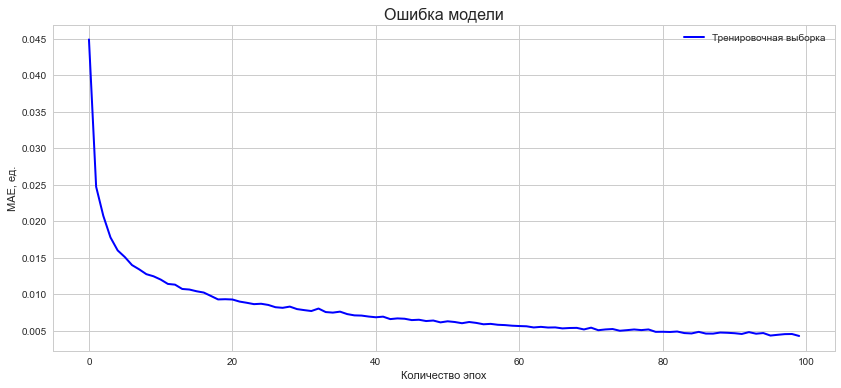

In [38]:
#plot the training losses
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(history['loss'], 'b', label='Тренировочная выборка', linewidth=2)
#ax.plot(history['val_loss'], 'r', label='Валидационная выборка', linewidth=2)
ax.set_title('Ошибка модели', fontsize=16)
ax.set_ylabel('MAE, ед.')
ax.set_xlabel('Количество эпох')
ax.legend(loc='best')
plt.show()
fig.savefig('Обучение', dpi=300)

In [24]:
X_pred = model.predict(X_test)
len(X_pred)

13746

In [25]:
data_result = data_9A
data_result['model'] = 0
for i in range(len(X_pred)):
    if X_pred[i][0] > X_pred[i][1]:
        data_result.loc[i,['model']] = 1
    else:
        data_result.loc[i,['model']] = 0
data_result.head()

,MD,TVD,WOB,Torque,ROP,RPM,Diameter,Standpipe Pressure,Hookload,Gamma,MSE,complication,model
0,491.033,490.760309,6.783699,0.425185,46.153444,84.0,311.15,9440.922214,93.780222,150.88,-7.052692,0,0
1,491.185,490.910880,6.688755,0.299040,45.071869,84.0,311.15,9499.941336,93.979803,150.88,-5.797103,0,0
2,491.222,490.910880,6.589792,0.193413,44.097526,84.0,311.15,9499.941336,93.979803,150.88,-4.532069,0,0
3,491.338,491.061756,6.487085,0.107537,43.226799,84.0,311.15,9313.024466,94.079593,146.26,-3.258502,0,0
4,491.341,491.061756,6.380911,0.040646,42.456071,84.0,311.15,9313.024466,94.079593,146.26,-1.977316,0,0


In [26]:
data = pd.read_csv('data\data.csv')
data

FileNotFoundError: [Errno 2] No such file or directory: 'data\\data.csv'

In [13]:
data_result[data_result['model']==1]

,MD,TVD,WOB,Torque,ROP,RPM,Diameter,Standpipe Pressure,Hookload,Gamma,MSE,complication,model
8031,957.886,881.360594,1.993107,7.809647,26.628929,140.40,215.9,4990.839014,97.545039,52.61,554.035599,1,1
8032,957.907,881.360594,1.982495,7.886249,25.105936,140.40,215.9,4990.839014,97.545039,52.61,565.138785,1,1
8033,957.974,881.360594,1.974684,7.952547,23.643416,140.40,215.9,4990.839014,97.545039,52.61,575.796165,1,1
8034,957.986,881.451730,1.962809,8.016855,22.229778,140.54,215.9,4975.394758,97.549575,52.61,585.657117,1,1
8035,957.996,881.451730,1.949376,8.070212,20.869223,140.54,215.9,4975.394758,97.549575,52.61,594.713033,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13043,1172.718,995.979110,11.189856,9.318598,33.358058,194.51,215.9,10553.598146,88.695452,23.49,564.550088,1,1
13044,1172.764,995.979110,11.206748,9.309972,33.486810,194.51,215.9,10553.598146,88.695452,23.49,562.763032,1,1
13045,1172.816,995.979110,11.225145,9.313879,33.617587,194.51,215.9,10553.598146,88.695452,23.49,560.736127,1,1
13046,1172.867,995.979110,11.243090,9.318384,33.772042,194.51,215.9,10553.598146,88.695452,23.49,559.496601,1,1


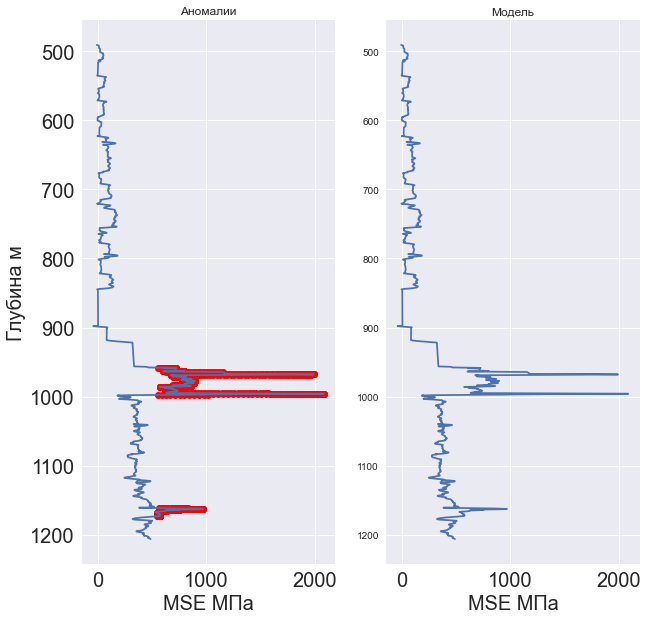

In [27]:
figure = plot_complications(data_result)

In [15]:
print(classification_report(data_result['complication'],data_result['model']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12164
           1       1.00      0.98      0.99      1582

    accuracy                           1.00     13746
   macro avg       1.00      0.99      0.99     13746
weighted avg       1.00      1.00      1.00     13746



In [11]:
model.save('sequential_model.h5')